In [7]:
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as inputData
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta

In [4]:
data = inputData.read_data_sets('data', one_hot=True)
print(len(data.train.labels))
print(len(data.test.labels))
print(len(data.validation.labels))

Extracting data\train-images-idx3-ubyte.gz
Extracting data\train-labels-idx1-ubyte.gz
Extracting data\t10k-images-idx3-ubyte.gz
Extracting data\t10k-labels-idx1-ubyte.gz
55000
10000
5000


In [5]:
def plotNumbers(imset, valset, dimen):
    fig, axis = plt.subplots(dimen[0],dimen[1])

    for pos, sub in enumerate(axis.flat):
        sub.imshow(imset[pos].reshape((28,28)))
        sub.set_xticks([])
        sub.set_yticks([])
        sub.set_xlabel('pred:%r' %valset[pos])
    plt.show()

In [11]:
num_of_epochs = 50
batch_size = 100
accu_list = []
epoch_size = int(len(data.train.labels)/batch_size)

X = tf.placeholder(tf.float32, shape=[None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
Y_ori = tf.placeholder(tf.float32, shape=[None, 10])

init = tf.initialize_all_variables()

actiFunc = tf.matmul(X, W) + b
Y_pred = tf.nn.softmax(actiFunc)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=actiFunc, labels=Y_ori)
cost = tf.reduce_mean(cross_entropy)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.03)
trainer = optimizer.minimize(cost)

correct_prediction = tf.equal(tf.argmax(Y_ori, axis=1), tf.argmax(Y_pred, axis=1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess = tf.Session()
sess.run(init)
start_time = time.time()

for val in range(epoch_size*num_of_epochs):
    train_batch_x, train_batch_y = data.train.next_batch(batch_size)
    tr = sess.run(trainer, feed_dict={X:train_batch_x, Y_ori:train_batch_y})
    
    if (val/epoch_size)%5==0:
        accu_list.append(sess.run(accuracy, feed_dict={X: data.test.images, Y_ori: data.test.labels}))
        
print(accu_list)

end_time = time.time()
print('total time taken is %s' %str(timedelta(seconds=int(round(end_time-start_time)))))

[0.4109, 0.9087, 0.9146, 0.9181, 0.9191, 0.9199, 0.9207, 0.9218, 0.9234, 0.9221]
total time taken is 0:00:36


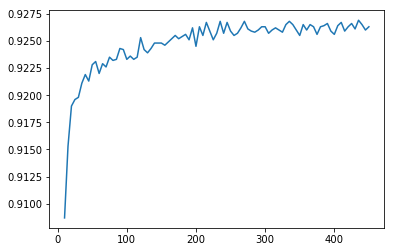

In [407]:
xVal = np.arange(10,num_of_epochs+5,5)
plt.plot(xVal, accu_list[1:])
plt.show()

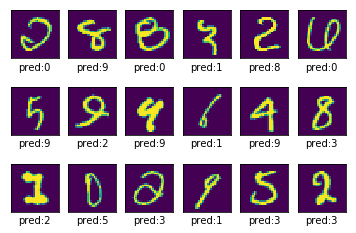

735

In [408]:
prediction = tf.argmax(Y_pred, axis=1)

predict_bool = sess.run(correct_prediction, feed_dict={X: data.test.images, Y_ori: data.test.labels})
predict_bool_inv = [not val for val in predict_bool]
failed_images = data.test.images[predict_bool_inv]

failed_pred = sess.run(prediction, feed_dict={X:failed_images})

plotNumbers(failed_images[200:218], failed_pred[200:218], dimen=(3,6))
len(failed_images)

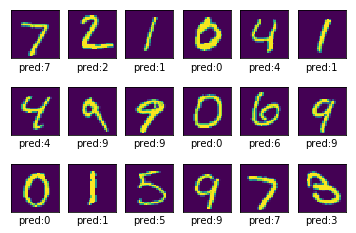

In [409]:
successful_images = data.test.images[predict_bool]
successful_pred = sess.run(prediction, feed_dict={X:successful_images})

plotNumbers(successful_images[0:18], successful_pred[0:18], dimen=(3,6))

In [410]:
test_pred = sess.run(prediction, feed_dict={X: data.test.images})
test_true = data.test.labels.argmax(axis=1)

confu_matri = confusion_matrix(test_true, test_pred)
print(confu_matri)

[[ 959    0    1    3    0    7    5    4    1    0]
 [   0 1112    3    1    0    2    4    2   11    0]
 [   5    9  930   14    9    3   15    9   35    3]
 [   4    1   15  922    0   25    3   12   22    6]
 [   1    2    6    3  920    0    9    3    9   29]
 [  10    3    3   37    9  775   13    9   28    5]
 [   8    3    5    2    7   15  915    2    1    0]
 [   1    8   21    8    7    1    0  953    2   27]
 [   9   11    7   25    8   26   11   10  857   10]
 [  11    8    1    8   24    7    0   21    7  922]]


In [411]:
#failed: 754, epoch: 150
#failed: 735, epoch: 450

In [418]:
len(data.train.labels)

55000